<a href="https://colab.research.google.com/github/SrinivasMandla/Cognifyz-technologies-Data-Science/blob/main/Geospatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LEVEL 1**



**TASK 3**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [4]:

file_path = '/content/Dataset .csv'
df = pd.read_csv("/content/Dataset .csv")

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


*visualize the locations pd restaurents omna map using latitute and longitude*




In [5]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame as gdf

--2025-03-14 14:10:30--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.218.228.91, 52.92.240.185, 52.218.179.17, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.218.228.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.1s    

2025-03-14 14:10:31 (1.62 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_coun

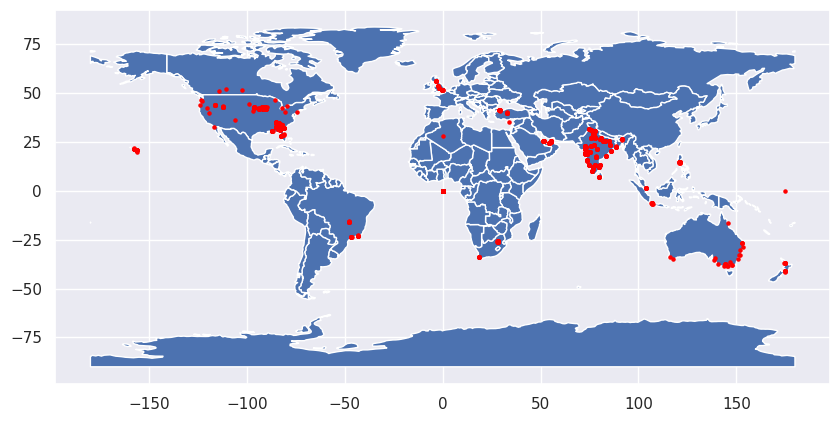

In [6]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

world = gpd.read_file("ne_110m_admin_0_countries.shp")

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

*analyze the distribution of restaurents across different cities or countries .Determine if there is any corelation between the restaurents location and its rating*

Column 'city' not found. Available columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


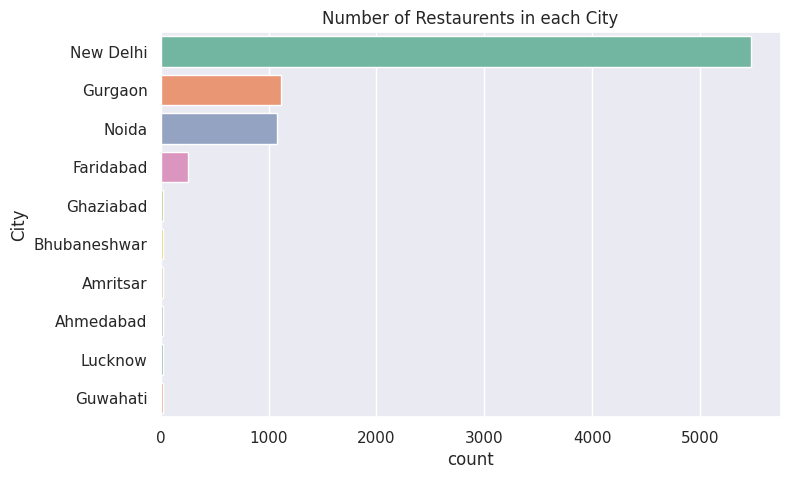

In [7]:
plt.figure(figsize=(8,5))

if 'city' not in df.columns:

  print(f"Column 'city' not found. Available columns: {df.columns}")
  city_column = 'City'
else:
  city_column = 'city'
sns.countplot(y=df[city_column], order=df[city_column].value_counts().head(10).index, palette='Set2')
plt.title('Number of Restaurents in each City')
plt.show()

***checking the correlation between the restaurents location and its rating ***

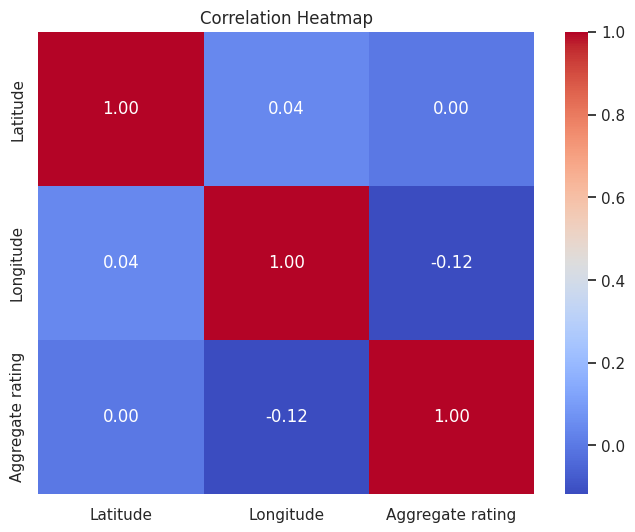

In [11]:
plt.figure(figsize=(8,6))
correlation_matrix = df[['Latitude','Longitude','Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [14]:
output_file_path = r"C:\Users\manne\Downloads\Dataset .csv"
df.to_csv(output_file_path, index=False)
print(f"Dataframe has been save to {output_file_path}")

Dataframe has been save to C:\Users\manne\Downloads\Dataset .csv


• The Restaurant Dataset has various attributes such as Restaurant ids, Restaurant Name. City, Country, Types of Cuisines, etc.

• There are 9551 Rows and 21 Columns

• In this Dataset 9 missing values from the "Cuisines" Column. So, it can be replaced by Not Specified.

In this Dataset, No Duplicates are present

• No need to do any data type conversion & No Class Imbalance.

• After exploring the distribution of categorical variables like "Country Code", "City" and "Cuisines. I've found that the majority of restaurants are located in Country Code 1, followed by the second-highest concentration in Country Code 216. And 5473 Restaurant are located in Delhi, followed by 1118 in Gurgaon and 1080 in Noida.

• Top Cuisines are "North Indian", "Chinese", "Fast Food",
USA and India have the most number of restaurants.